1. Аналіз даних

In [14]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Підключення до Google Drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Colab Notebooks/mushroom_cleaned.csv'
df = pd.read_csv(file_path)

print("Перші 5 рядків датасету:")
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Перші 5 рядків датасету:
   cap-diameter  cap-shape  gill-attachment  gill-color  stem-height  \
0          1372          2                2          10     3.807467   
1          1461          2                2          10     3.807467   
2          1371          2                2          10     3.612496   
3          1261          6                2          10     3.787572   
4          1305          6                2          10     3.711971   

   stem-width  stem-color    season  class  
0        1545          11  1.804273      1  
1        1557          11  1.804273      1  
2        1566          11  1.804273      1  
3        1566          11  1.804273      1  
4        1464          11  0.943195      1  


In [15]:
print("\nРозмір датасету:", df.shape)

print("\nПропущені значення в кожному стовпці:")
print(df.isnull().sum())

print("\nТипи даних:")
print(df.dtypes)



Розмір датасету: (54035, 9)

Пропущені значення в кожному стовпці:
cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

Типи даних:
cap-diameter         int64
cap-shape            int64
gill-attachment      int64
gill-color           int64
stem-height        float64
stem-width           int64
stem-color           int64
season             float64
class                int64
dtype: object



Матриця кореляції:


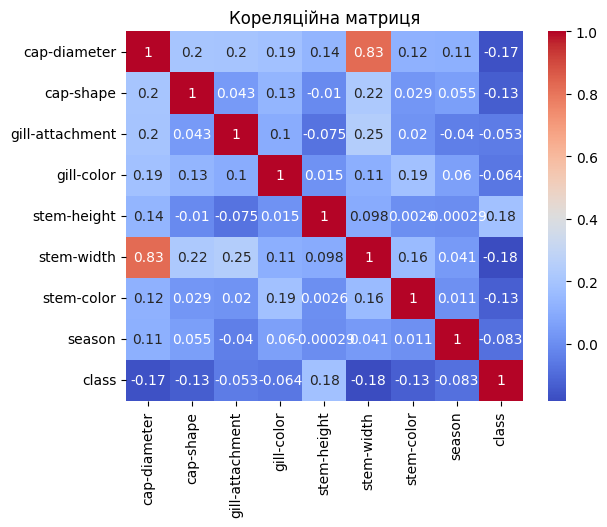


Кореляція з цільовою змінною 'class':
class              1.000000
stem-height        0.183354
gill-attachment   -0.052541
gill-color        -0.063947
season            -0.082919
stem-color        -0.128339
cap-shape         -0.133338
cap-diameter      -0.165676
stem-width        -0.182856
Name: class, dtype: float64


In [18]:
print("\nМатриця кореляції:")
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Кореляційна матриця")
plt.show()

# Кореляція з цільовою функцією
target_column = 'class'
print(f"\nКореляція з цільовою змінною '{target_column}':")
print(correlation_matrix[target_column].sort_values(ascending=False))

2. Побудова моделей класифікації

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Розділення на навчальну та тестову вибірки
X = df.drop(columns=[target_column])
y = df[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Модель 1: Випадковий ліс
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Оцінка моделі 1
print("\nМетрики для моделі Випадковий ліс:")
print("Точність:", accuracy_score(y_test, rf_predictions))
print("Матриця плутанини:\n", confusion_matrix(y_test, rf_predictions))
print("Класифікаційний звіт:\n", classification_report(y_test, rf_predictions))

# Модель 2: Логістична регресія
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Оцінка моделі 2
print("\nМетрики для моделі Логістична регресія:")
print("Точність:", accuracy_score(y_test, lr_predictions))
print("Матриця плутанини:\n", confusion_matrix(y_test, lr_predictions))
print("Класифікаційний звіт:\n", classification_report(y_test, lr_predictions))



Метрики для моделі Випадковий ліс:
Точність: 0.9906853371167725
Матриця плутанини:
 [[7272   77]
 [  74 8788]]
Класифікаційний звіт:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      7349
           1       0.99      0.99      0.99      8862

    accuracy                           0.99     16211
   macro avg       0.99      0.99      0.99     16211
weighted avg       0.99      0.99      0.99     16211


Метрики для моделі Логістична регресія:
Точність: 0.6350626118067979
Матриця плутанини:
 [[3929 3420]
 [2496 6366]]
Класифікаційний звіт:
               precision    recall  f1-score   support

           0       0.61      0.53      0.57      7349
           1       0.65      0.72      0.68      8862

    accuracy                           0.64     16211
   macro avg       0.63      0.63      0.63     16211
weighted avg       0.63      0.64      0.63     16211



3. Визначення оптимальної кількості кластерів (Метод ліктя та силуетів)

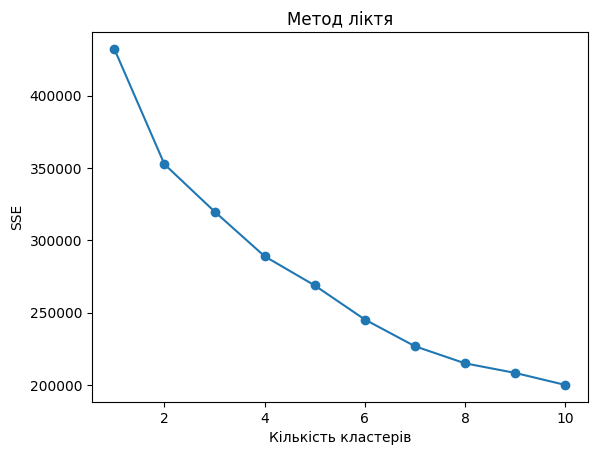

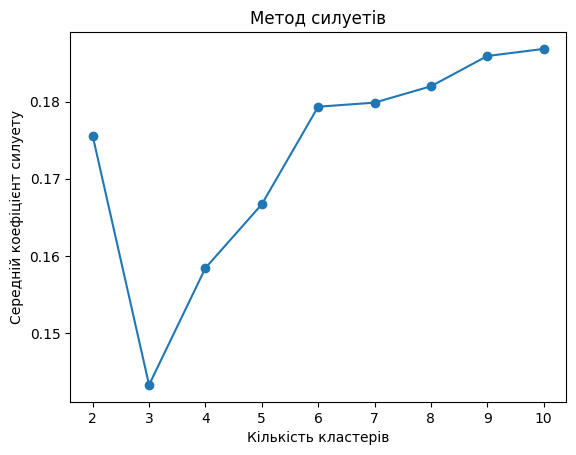

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Масштабування даних
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Метод ліктя
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.title("Метод ліктя")
plt.xlabel("Кількість кластерів")
plt.ylabel("SSE")
plt.show()

# Метод силуетів
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title("Метод силуетів")
plt.xlabel("Кількість кластерів")
plt.ylabel("Середній коефіцієнт силуету")
plt.show()


4. Візуалізація кластерів (K-Means і DBSCAN)

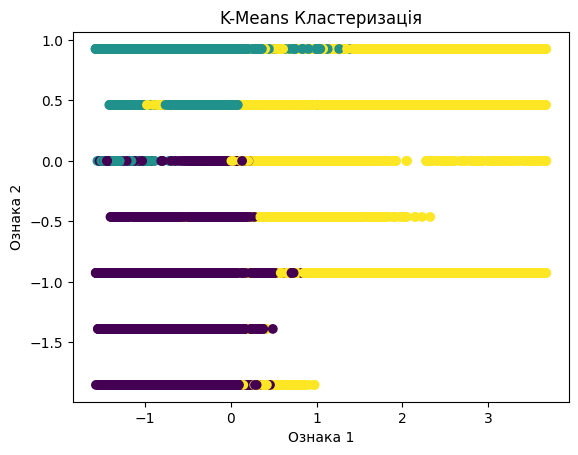

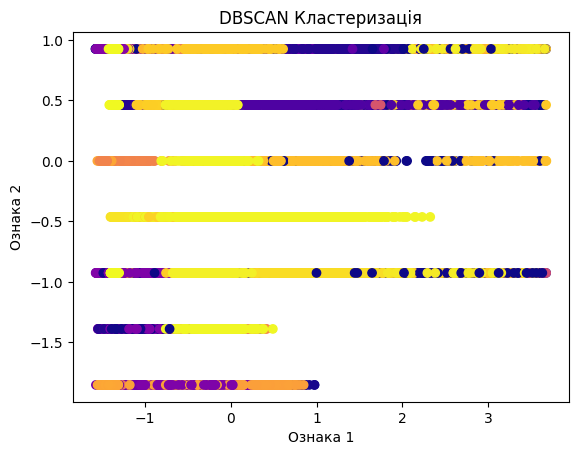

In [27]:
from sklearn.cluster import DBSCAN

# K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("K-Means Кластеризація")
plt.xlabel("Ознака 1")
plt.ylabel("Ознака 2")
plt.show()

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='plasma')
plt.title("DBSCAN Кластеризація")
plt.xlabel("Ознака 1")
plt.ylabel("Ознака 2")
plt.show()
